In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns

In [59]:
df=pd.read_csv('Dataset.csv')

In [51]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [60]:
df.isnull().sum()
# Here we have null values in gender,married,dependnts,self education, loan amount , loan term and credit history columns 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
df.shape

(614, 13)

In [16]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Filling Null Values


In [61]:
# Filling null values of object datatype columns
df['Married'] = df['Married'].fillna(df['Gender'].mode()[0])

In [62]:

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])


In [63]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


In [64]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])


<Axes: >

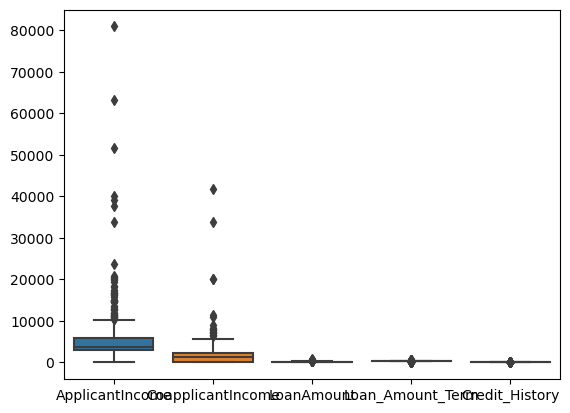

In [68]:
#Checking for the outliers
plt.figsize=(30,5)
sns.boxplot(data=df)

In [66]:
#Treating null values of numeric datatype columns 
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())


In [67]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

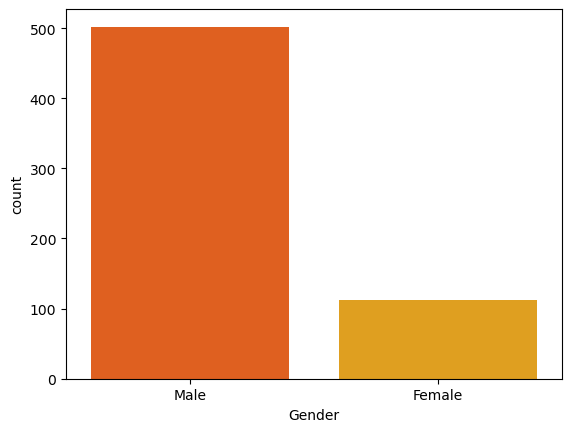

In [94]:
print(df['Gender'].value_counts())
df['Gender'].value_counts
sns.countplot(x='Gender',data=df,palette='autumn')

Married
Yes     398
No      213
Male      3
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

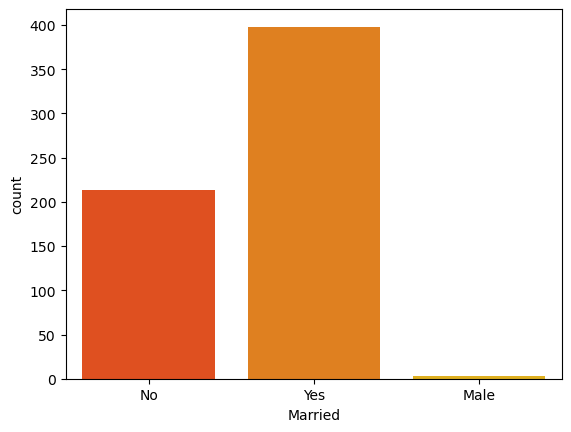

In [93]:
print(df['Married'].value_counts())
df['Married'].value_counts
sns.countplot(x='Married',data=df,palette='autumn')

Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

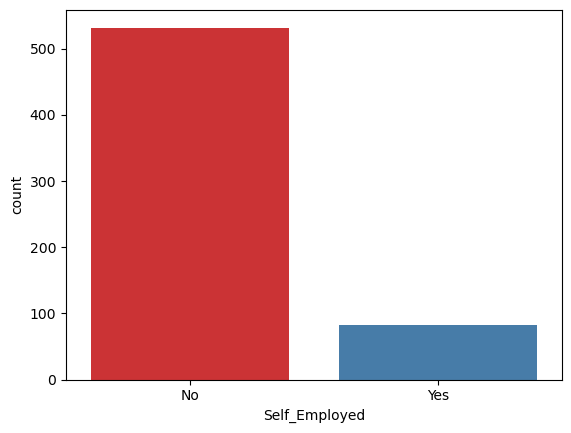

In [92]:
print(df['Self_Employed'].value_counts())
df['Self_Employed'].value_counts
sns.countplot(x='Self_Employed',data=df,palette='Set1')

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

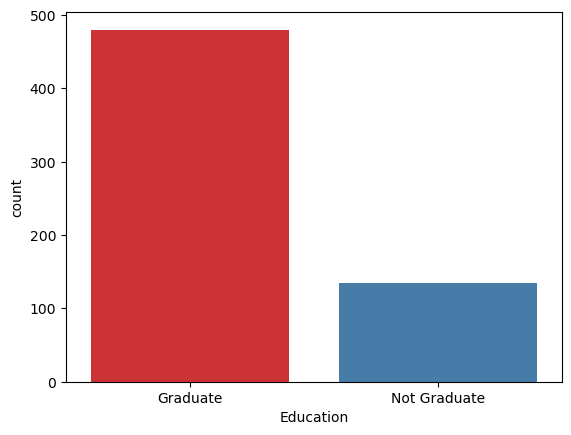

In [90]:
print(df['Education'].value_counts())
df['Education'].value_counts()
sns.countplot(x='Education',data=df,palette='Set1')

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

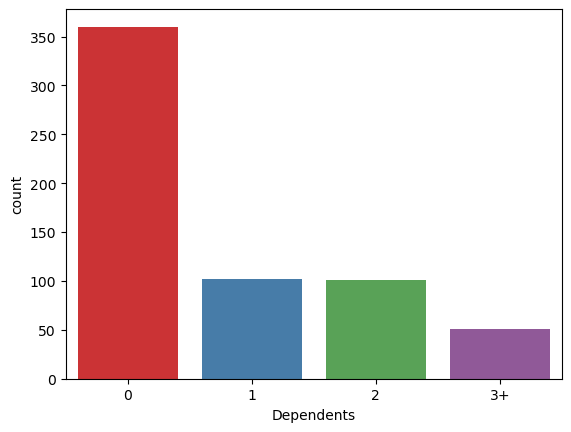

In [95]:
print(df['Dependents'].value_counts())
df['Dependents'].value_counts()
sns.countplot(x='Dependents',data=df,palette='Set1')

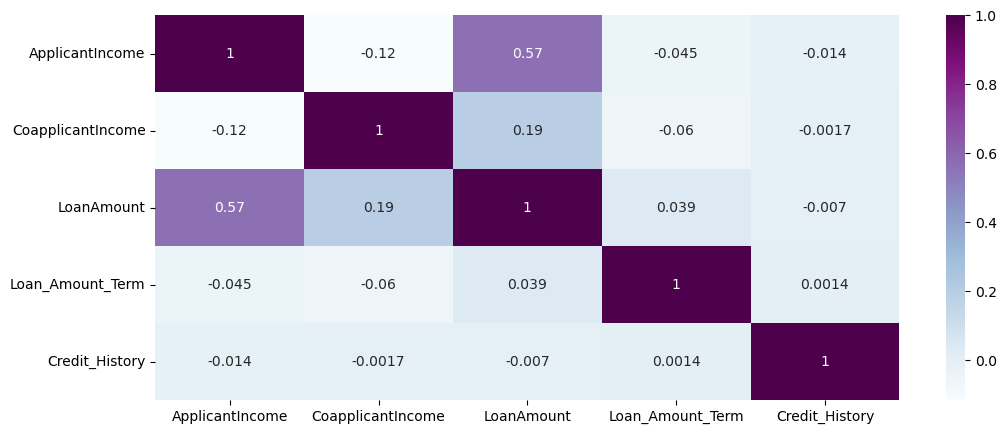

In [103]:
# Assuming df is your DataFrame
# Remove non-numeric columns (like identifiers) if necessary
numeric_df = df.select_dtypes(include=np.number)

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(corr_matrix, annot=True, cmap='BuPu')
plt.show()


# Feature Engineering

In [107]:
# Total applicant income column by adding applicanincome and coapplicant income
df["Total_Income"] = df["ApplicantIncome"]+df["CoapplicantIncome"]


<Axes: xlabel='ApplicantIncomeLog', ylabel='Density'>

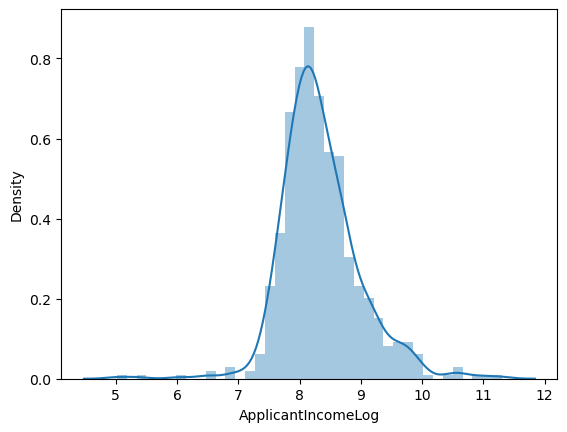

In [108]:
# Applying Log Transformation for normalizing the values 
df["ApplicantIncomeLog"] = np.log(df["ApplicantIncome"]+1)
sns.distplot(df["ApplicantIncomeLog"]) 


<Axes: xlabel='Loan_Amount_TermLog', ylabel='Density'>

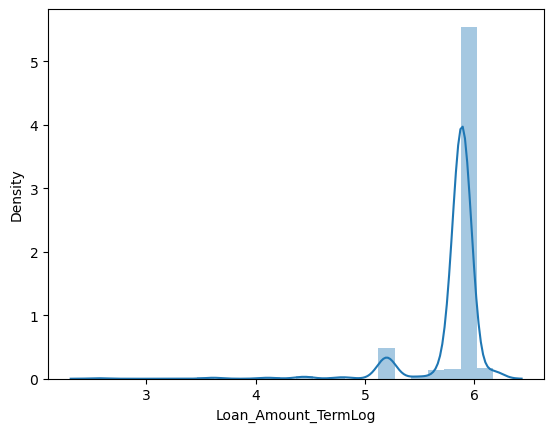

In [110]:
df["Loan_Amount_TermLog"] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df["Loan_Amount_TermLog"]) 


In [109]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'ApplicantIncomeLog'],
      dtype='object')

<Axes: xlabel='LoanAmount_Log', ylabel='Density'>

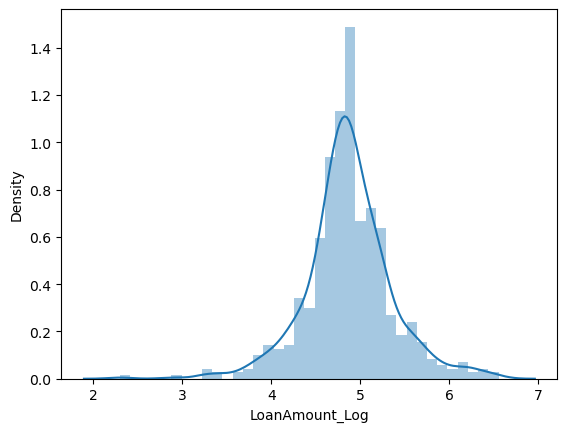

In [111]:
df["LoanAmount_Log"] = np.log(df['LoanAmount']+1)
sns.distplot(df["LoanAmount_Log"]) 

<Axes: xlabel='Total_Income_Log', ylabel='Density'>

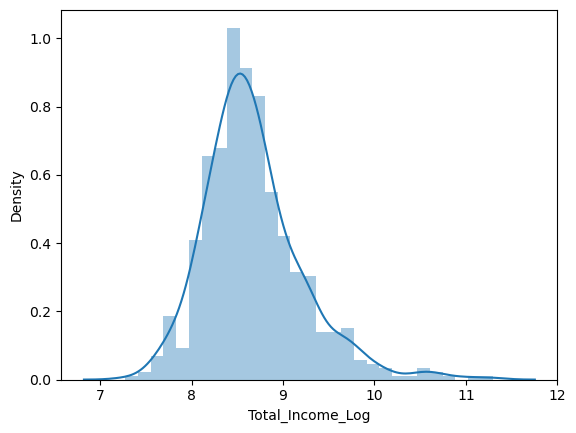

In [112]:
df["Total_Income_Log"] = np.log(df['Total_Income']+1)
sns.distplot(df["Total_Income_Log"]) 

In [119]:
# Dropping Unneccessary columns 
cols=["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Total_Income","Loan_ID"] 
df.drop(columns= cols , axis = 1,inplace=True) 
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,Loan_Amount_TermLog,LoanAmount_Log,Total_Income_Log
0,1,1,0,0,0,1.0,2,1,8.674197,5.888878,4.859812,8.674197
1,1,2,1,0,0,1.0,0,0,8.430327,5.888878,4.859812,8.714732
2,1,2,0,0,1,1.0,2,1,8.006701,5.888878,4.204693,8.006701


#  Encoding Technique 

In [116]:
# Encoding Technique 
#1 -- Ordinal Encoding 
# 2 -- Nominal Encoding 
from sklearn.preprocessing import LabelEncoder 
cols = ["Gender","Married","Dependents","Education","Property_Area","Loan_Status","Self_Employed"]
Le= LabelEncoder()
for col in cols:
    df[col] = Le.fit_transform(df[col])

In [120]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,Loan_Amount_TermLog,LoanAmount_Log,Total_Income_Log
0,1,1,0,0,0,1.0,2,1,8.674197,5.888878,4.859812,8.674197
1,1,2,1,0,0,1.0,0,0,8.430327,5.888878,4.859812,8.714732
2,1,2,0,0,1,1.0,2,1,8.006701,5.888878,4.204693,8.006701
3,1,2,0,1,0,1.0,2,1,7.857094,5.888878,4.795791,8.505525
4,1,1,0,0,0,1.0,2,1,8.699681,5.888878,4.955827,8.699681


In [121]:
df.dtypes

Gender                   int32
Married                  int32
Dependents               int32
Education                int32
Self_Employed            int32
Credit_History         float64
Property_Area            int32
Loan_Status              int32
ApplicantIncomeLog     float64
Loan_Amount_TermLog    float64
LoanAmount_Log         float64
Total_Income_Log       float64
dtype: object

In [122]:
#Spliting the depent and independent Features 
x= df.drop(columns=["Loan_Status"],axis = 1)
y=df["Loan_Status"] # this is our Target Variable

In [124]:
x # this is our independent variables 
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

# Train and Test

In [127]:
from sklearn.model_selection import train_test_split , cross_val_score 
from sklearn.metrics import accuracy_score , confusion_matrix 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier

In [129]:
x_train ,x_test ,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [147]:
#Logistic Regression 
lr= LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_lr)

In [132]:
accuracy*100

78.86178861788618

In [133]:
# Cross validation model 
score = cross_val_score(lr,x,y,cv=5)
score

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

In [134]:
np.mean(score)*100

80.9462881514061

In [148]:
# Decision Tree Model 
dc = DecisionTreeClassifier()
dc.fit(x_train,y_train)
y_pred_dc=dc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_dc)
print("Accuracy score of DecisionTree:", accuracy*100)

Accuracy score of DecisionTree: 67.47967479674797


In [140]:
score = cross_val_score(dc,x,y,cv=5)
print('Cross Validation score of Decision Tree :',np.mean(score)*100)

Cross Validation score of Decision Tree : 69.54418232706917


In [149]:
# RamdomForestClassifier 
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred_rfc=rfc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_rfc)
print("Accuracy score of RandomForestClassifier :", accuracy*100)

Accuracy score of RandomForestClassifier : 77.23577235772358


In [150]:
#KNeighborsClassifier 
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(x_train,y_train)
y_pred_knc=knc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_knc)
print("Accuracy score of KNeighborsClassifier  :", accuracy*100)

Accuracy score of KNeighborsClassifier  : 69.91869918699187


In [146]:
#Cross validation
score = cross_val_score(knc,x,y,cv=3)
print('Cross Validation score of KNeighborsClassifier :',np.mean(score)*100)

Cross Validation score of KNeighborsClassifier : 73.94229236410011


# Classification Report

In [151]:
from sklearn.metrics import classification_report 
def generate_classification_report(model_name ,y_test ,y_pred):
    report = classification_report(y_test,y_pred)
    print(f"Classification report for {model_name}:\n{report}\n") 
    
    
generate_classification_report(lr,y_test,y_pred_lr)
generate_classification_report(dc,y_test,y_pred_dc)
generate_classification_report(rfc,y_test,y_pred_rfc)
generate_classification_report(knc,y_test,y_pred_knc)

Classification report for LogisticRegression():
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


Classification report for DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.54      0.49      0.51        43
           1       0.74      0.78      0.76        80

    accuracy                           0.67       123
   macro avg       0.64      0.63      0.63       123
weighted avg       0.67      0.67      0.67       123


Classification report for RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                

In [153]:
pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/6e/1b/66764ecf370e797759be06fb38c11640ea1f9456ae10f8640a33cfa726ea/imbalanced_learn-0.12.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.0 kB 435.7 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/258.0 kB 751.6 kB/s eta 0:00:01
   ------------------------------------ --- 235.5/258.0 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 258.0/258.0 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [154]:
from imblearn.over_sampling import RandomOverSampler

In [159]:
oversample=RandomOverSampler(random_state=42)
x_resampled,y_resampled=oversample.fit_resample(x,y)
df_resampled = pd.concat([pd.DataFrame(x_resampled,columns=x.columns),pd.Series(y_resampled,name="Loan_Status")],axis=1)

In [161]:
x_resampled

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,Loan_Amount_TermLog,LoanAmount_Log,Total_Income_Log
0,1,1,0,0,0,1.000000,2,8.674197,5.888878,4.859812,8.674197
1,1,2,1,0,0,1.000000,0,8.430327,5.888878,4.859812,8.714732
2,1,2,0,0,1,1.000000,2,8.006701,5.888878,4.204693,8.006701
3,1,2,0,1,0,1.000000,2,7.857094,5.888878,4.795791,8.505525
4,1,1,0,0,0,1.000000,2,8.699681,5.888878,4.955827,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
839,1,2,3,1,0,1.000000,2,8.292298,5.198497,4.859812,8.292298
840,1,2,1,0,0,0.842199,0,7.539559,5.888878,4.127134,7.539559
841,1,2,1,0,0,0.000000,0,7.933080,5.888878,4.990433,8.456381
842,1,2,2,1,0,0.000000,2,7.969012,5.198497,3.828641,7.969012


In [162]:
y_resampled

0      1
1      0
2      1
3      1
4      1
      ..
839    0
840    0
841    0
842    0
843    0
Name: Loan_Status, Length: 844, dtype: int32

In [164]:
y_resampled.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

In [166]:
x_resampled_train,x_resampled_test,y_resampled_train,y_resampled_test = train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)

In [167]:
#Logistic Regression 
lr= LogisticRegression()
lr.fit(x_resampled_train,y_resampled_train)
y_pred_lr = lr.predict(x_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_lr)

In [168]:
accuracy*100

69.8224852071006

In [171]:
# Decision Tree Model 
dc = DecisionTreeClassifier()
dc.fit(x_resampled_train,y_resampled_train)
y_pred_dc=dc.predict(x_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_dc)
print("Accuracy score of DecisionTree:", accuracy*100)

Accuracy score of DecisionTree: 80.4733727810651


In [173]:
#KNeighborsClassifier 
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(x_resampled_train,y_resampled_train)
y_pred_knc=knc.predict(x_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_knc)
print("Accuracy score of KNeighborsClassifier  :", accuracy*100)

Accuracy score of KNeighborsClassifier  : 73.96449704142012


In [174]:
# RamdomForestClassifier 
rfc = RandomForestClassifier()
rfc.fit(x_resampled_train,y_resampled_train)
y_pred_rfc=rfc.predict(x_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_rfc)
print("Accuracy score of RandomForestClassifier :", accuracy*100)

Accuracy score of RandomForestClassifier : 91.12426035502959


In [175]:
from sklearn.metrics import classification_report 
def generate_classification_report(model_name ,y_test ,y_pred):
    report = classification_report(y_test,y_pred)
    print(f"Classification report for {model_name}:\n{report}\n") 
    
    
generate_classification_report(lr,y_resampled_test,y_pred_lr)
generate_classification_report(dc,y_resampled_test,y_pred_dc)
generate_classification_report(rfc,y_resampled_test,y_pred_rfc)
generate_classification_report(knc,y_resampled_test,y_pred_knc)

Classification report for LogisticRegression():
              precision    recall  f1-score   support

           0       0.88      0.53      0.66        94
           1       0.61      0.91      0.73        75

    accuracy                           0.70       169
   macro avg       0.74      0.72      0.69       169
weighted avg       0.76      0.70      0.69       169


Classification report for DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        94
           1       0.83      0.71      0.76        75

    accuracy                           0.80       169
   macro avg       0.81      0.79      0.80       169
weighted avg       0.81      0.80      0.80       169


Classification report for RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        94
           1       0.88      0.93      0.90        75

    accuracy                